In [35]:
import pandas as pd
import numpy as np

import psycopg2 as pg
import pandas.io.sql as psql

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
connection = pg.connect(dbname='brent', user='brent', host='localhost', password='brent')
cur = connection.cursor()
table_names = ['addresses','categories',
            'categories_products','category_features','clients',
               'companies','featured_items','invitations','order_items',
               'orders','popular_items','products','projects','projects_collaborators',
               'projects_products','proposal_product','proposals','saved_searches',
               'schema_version','showrooms','showrooms_vendors','spring_session',
               'spring_session_attributes','styles','user_addresses',
               'users','vendors','vendors_styles']
d = {}
for i in table_names:
    cur.execute('SELECT * FROM {}'.format(i))
    the_data = cur.fetchall()
    colnames = [desc[0] for desc in cur.description]

    d[i] = pd.DataFrame(the_data)
    if len(d[i].columns) == len(colnames):
        d[i].columns = colnames
    else:
        print i

d_dyn = {}
d_categories = {}
# c = 0
for idx,i in enumerate(d['products']['dynamoid']):
#     if c == 1000:
#         break
    if "|" not in i:
        d_dyn[d['products']['id'][idx]] = i
#         c+=1
    else:
        ret = i.split('|')
        d_dyn[d['products']['id'][idx]] = ret[-1]
        d_categories[d['products']['id'][idx]] = ret[-2]
#         c+=1


categories_products


In [3]:
cats = set()
for key, val in d_categories.iteritems():
    cats.update(val)
print cats

set(['3'])


In [4]:
titles = set()
for idx, i in enumerate(d['products']['title']):
    titles.update(i)
print len(titles)

TypeError: 'NoneType' object is not iterable

In [ ]:
len(set(d['products']["title"]))

In [ ]:
d['popular_items'].head()

In [ ]:
d['popular_items']['item_type'].unique()

In [ ]:
len(d['popular_items']['item_id'].unique())

In [ ]:
d['popular_items']['score'].unique()

In [ ]:
for i in d['popular_items'].columns:
    print i, len(d['popular_items'][i].unique())

## popular item counter

In [5]:
keys = []
d_pop = {}
for idx in range(0,len(d['popular_items'])):
    if d['popular_items']['score'][idx] not in keys:
        d_pop[d['popular_items']['score'][idx]] = list()
        keys.append(d['popular_items']['score'][idx]) 
    d_pop[d['popular_items']['score'][idx]].append(d['popular_items']['item_id'])

In [6]:
popularity = []
for key, val in d_pop.iteritems():
    popularity.append([key, len(val)])

In [7]:
popu = pd.DataFrame(popularity)

# plt.scatter(popularity)

In [8]:
import sys
sys.path.append("..")
import Data.pull_df_from_mongo as pull_df
import pandas as pd
import numpy as np


In [11]:
import model.transform_df as ld

In [12]:
df = ld.main()

set(['Mid-Century', 'Rustic', 'Arts and Crafts', 'Geometric', 'Rococo', 'Folk Art', 'nan', 'Regency', 'Neoclassical', 'Stripe', 'Floral', 'Coastal ', 'Mid Century', 'Country ', 'Transitional', 'Solid', 'Country', 'Tribal', 'Traditional', 'Victorian', 'Art Nouveau', 'Hollywood Regency', 'Baroque', 'Woven', 'Prints', 'Industrial', 'Classic', 'Abstract', 'Modern', 'Contemporary', 'Transitional ', 'Gothic', 'Asian', 'Coastal', 'Southwestern', 'Art Deco', 'Louis XVI'])


In [ ]:
df.info()

In [ ]:
showrooms = df['showrooms']

In [33]:
def check_see(col,n=5):
    check = set(df[col])
    c = 0
    for i in check:
        if c == n:
            break
        else:
            print i
        c+=1
from collections import Counter
def check_counter(col):
    check = df[col]
    counter = Counter(check)
    print "Total uniques:  ",len(list(counter.iterkeys()))
    print counter

def check_dict(col,n=5):
    check = df[col]
    c = 0
    for i in check:
        if c == n:
            break
        elif i in [[],np.nan]:
            continue
        else:
            print i
            c+=1




In [36]:
check_dict("showrooms")

[{u'city': u'Dallas', u'state': u'TX', u'name': u'Dallas Design Center', u'id': 6}, {u'city': u'Honolulu', u'state': u'HI', u'name': u'Pacific Finishes LLC', u'id': 70}, {u'city': u'Atlanta', u'state': u'GA', u'name': u'ADAC', u'id': 4}, {u'city': u'Denver', u'state': u'CO', u'name': u'Town Studio - Denver', u'id': 43}, {u'city': u'Costa Mesa', u'state': u'CA', u'name': u'Stonemill Design Center', u'id': 53}, {u'city': u'Houston', u'state': u'TX', u'name': u'Decorative Center of Houston \u2003 ', u'id': 9}, {u'city': u'High Point', u'state': u'NC', u'name': u'High Point', u'id': 33}, {u'city': u'West Hollywood', u'state': u'CA', u'name': u'Holly Hunt - LA', u'id': 72}, {u'city': u'Chicago', u'state': u'IL', u'name': u' Merchandise Mart ', u'id': 32}, {u'city': u'Minneapolis', u'state': u'MN', u'name': u'International Market Square', u'id': 10}, {u'city': u'Boston', u'state': u'MA', u'name': u'Boston Design Center', u'id': 3}, {u'city': u'New York', u'state': u'NY', u'name': u'D&D Build

In [17]:
from collections import Counter

In [31]:
df_showrooms = pd.DataFrame()
check = df["showrooms"]
col = []
for idx,i in enumerate(check):
    if i in [[],np.nan]:
        col.append(0)
    else:
        lst = []
        for group in i:
            lst.append("id_{}".format(group["id"]))
        col.append(lst)
df['showroom_ids'] = col
            

In [41]:
showrm_ids = set()

check = df['showroom_ids']
c=0
for showroom_ids in check:
    if showroom_ids == 0:
        c+=1
        continue
    else:
        for i in showroom_ids:
            showrm_ids.add(i)
print c


123021


In [45]:
check = df['showroom_ids']

for i in list(showrm_ids):
    col = []
    for idx in check:
        if idx == 0:
            col.append(0)
        elif i in idx:
            col.append(1)
        else:
            col.append(0)
    df[i] = col

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186626 entries, 0 to 186625
Columns: 275 entries, brand to id_326
dtypes: float64(29), int64(230), object(16)
memory usage: 391.6+ MB


In [47]:
use_col = []
for i in list(df.columns):
    if "id_" in i:
        use_col.append(i)

In [49]:
use_col.remove("Solid_style")

In [50]:
use_col

['id_382',
 'id_381',
 'id_173',
 'id_174',
 'id_176',
 'id_179',
 'id_263',
 'id_264',
 'id_660',
 'id_38',
 'id_39',
 'id_32',
 'id_33',
 'id_31',
 'id_36',
 'id_37',
 'id_34',
 'id_239',
 'id_238',
 'id_88',
 'id_377',
 'id_679',
 'id_84',
 'id_83',
 'id_82',
 'id_81',
 'id_80',
 'id_231',
 'id_682',
 'id_230',
 'id_309',
 'id_305',
 'id_98',
 'id_99',
 'id_118',
 'id_119',
 'id_112',
 'id_91',
 'id_92',
 'id_93',
 'id_94',
 'id_95',
 'id_96',
 'id_97',
 'id_10',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_680',
 'id_370',
 'id_681',
 'id_229',
 'id_109',
 'id_108',
 'id_379',
 'id_101',
 'id_100',
 'id_352',
 'id_353',
 'id_105',
 'id_74',
 'id_107',
 'id_355',
 'id_75',
 'id_73',
 'id_65',
 'id_64',
 'id_66',
 'id_61',
 'id_60',
 'id_63',
 'id_220',
 'id_186',
 'id_69',
 'id_221',
 'id_2',
 'id_3',
 'id_1',
 'id_6',
 'id_7',
 'id_4',
 'id_8',
 'id_9',
 'id_405',
 'id_406',
 'id_76',
 'id_77',
 'id_183',
 'id_182',
 'id_72',
 'id_150',
 'id_70',
 'id_71',
 'id_249',
 'id

In [51]:
corpus = df['text']


In [56]:
corpus_lens = []
for row in corpus:
    try:
        corpus_lens.append(len(row.split()))
    except:
        corpus_lens.append(0)
counter = Counter(corpus_lens)

In [57]:
counter

Counter({0: 20693,
         1: 5307,
         2: 8779,
         3: 11181,
         4: 8013,
         5: 8072,
         6: 6066,
         7: 6324,
         8: 6007,
         9: 4876,
         10: 4064,
         11: 4664,
         12: 2715,
         13: 2826,
         14: 2583,
         15: 2424,
         16: 2562,
         17: 2090,
         18: 2246,
         19: 2012,
         20: 1836,
         21: 1923,
         22: 2385,
         23: 1595,
         24: 1525,
         25: 1257,
         26: 1364,
         27: 1088,
         28: 989,
         29: 2369,
         30: 1097,
         31: 1155,
         32: 1240,
         33: 1122,
         34: 1083,
         35: 1009,
         36: 1365,
         37: 1069,
         38: 916,
         39: 869,
         40: 947,
         41: 852,
         42: 893,
         43: 1013,
         44: 782,
         45: 962,
         46: 775,
         47: 905,
         48: 1137,
         49: 946,
         50: 933,
         51: 911,
         52: 1340,
         53: 9

(array([ 26000.,  19960.,  16085.,  12390.,  10883.,   8728.,   5541.,
          5007.,   4652.,   4258.,   3759.,   3980.,   2782.,   2452.,
          3358.,   2252.,   2362.,   2092.,   2434.,   1785.,   1799.,
          1906.,   1744.,   1680.,   3016.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.]),
 <a list of 25 Patch objects>)

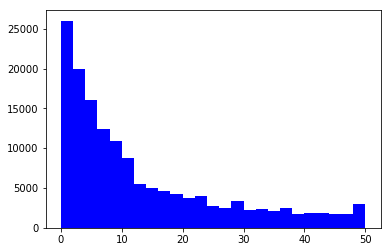

In [70]:
plt.hist(corpus_lens,bins=25,align="mid",range=[0,50],color='b',)

In [71]:
color_columns = []
for i in list(df.columns):
    if "color_" in i:
        color_columns.append(i)

In [72]:
df_colors = df[color_columns]

In [73]:
df_colors['sum'] = 0
for color in color_columns:
    df_colors['sum'] +=df_colors[color]

/home/brent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/brent/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
186626 - 168993

17633

In [77]:
style_cols = []
for i in list(df.columns):
    if "predict_" in i:
        continue
    elif "style_" in i:
        style_cols.append(i)


In [78]:
style_nums = {}
for style in style_cols:
    style_nums[style] = sum(df[style])

[]